<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_1X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_1_0_9_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_1X/groupwise_0.1_0.9'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.043111,-0.154091,101.889020,102.036027,-0.147007
1,0.0,1.0,77.507822,0.281764,87.789586,87.486509,0.303077
2,0.0,2.0,82.476560,0.090461,92.567021,92.460111,0.106909
3,0.0,3.0,51.851318,0.013225,61.864544,61.804889,0.059655
4,0.0,4.0,40.859312,0.080248,50.939560,50.802122,0.137438
...,...,...,...,...,...,...,...
59995,999.0,55.0,66.852453,-0.428955,76.423498,76.729645,-0.306147
59996,999.0,56.0,32.677382,0.253469,42.930852,42.709612,0.221239
59997,999.0,57.0,58.710256,0.158826,68.869083,68.624386,0.244697
59998,999.0,58.0,49.643629,-1.028950,58.614679,59.598890,-0.984211


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.043111 -0.154091  101.889020  102.036027 -0.147007
      1.0    77.507822  0.281764   87.789586   87.486509  0.303077
      2.0    82.476560  0.090461   92.567021   92.460111  0.106909
      3.0    51.851318  0.013225   61.864544   61.804889  0.059655
      4.0    40.859312  0.080248   50.939560   50.802122  0.137438
...                ...       ...         ...         ...       ...
999.0 55.0   66.852453 -0.428955   76.423498   76.729645 -0.306147
      56.0   32.677382  0.253469   42.930852   42.709612  0.221239
      57.0   58.710256  0.158826   68.869083   68.624386  0.244697
      58.0   49.643629 -1.028950   58.614679   59.598890 -0.984211
      59.0   94.051838  0.174316  104.226154  103.805638  0.420517

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.043111 -0.154091  101.889020  102.036027 -0.147007
      1.0    77.507822  0.281764   87.789586   87.486509  0.303077
      2.0    82.476560  0.090461   92.567021   92.460111  0.106909
      3.0    51.851318  0.013225   61.864544   61.804889  0.059655
      4.0    40.859312  0.080248   50.939560   50.802122  0.137438
...                ...       ...         ...         ...       ...
999.0 55.0   66.852453 -0.428955   76.423498   76.729645 -0.306147
      56.0   32.677382  0.253469   42.930852   42.709612  0.221239
      57.0   58.710256  0.158826   68.869083   68.624386  0.244697
      58.0   49.643629 -1.028950   58.614679   59.598890 -0.984211
      59.0   94.051838  0.174316  104.226154  103.805638  0.420517

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,92.043111,-0.154091,101.889020,102.036027,-0.147007
1,0.0,1.0,77.507822,0.281764,87.789586,87.486509,0.303077
2,0.0,2.0,82.476560,0.090461,92.567021,92.460111,0.106909
3,0.0,3.0,51.851318,0.013225,61.864544,61.804889,0.059655
4,0.0,4.0,40.859312,0.080248,50.939560,50.802122,0.137438
...,...,...,...,...,...,...,...
59995,999.0,55.0,66.852453,-0.428955,76.423498,76.729645,-0.306147
59996,999.0,56.0,32.677382,0.253469,42.930852,42.709612,0.221239
59997,999.0,57.0,58.710256,0.158826,68.869083,68.624386,0.244697
59998,999.0,58.0,49.643629,-1.028950,58.614679,59.598890,-0.984211


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    92.043111 -0.154091  101.889020  102.036027 -0.147007
      1.0    77.507822  0.281764   87.789586   87.486509  0.303077
      2.0    82.476560  0.090461   92.567021   92.460111  0.106909
      3.0    51.851318  0.013225   61.864544   61.804889  0.059655
      4.0    40.859312  0.080248   50.939560   50.802122  0.137438
...                ...       ...         ...         ...       ...
999.0 55.0   66.852453 -0.428955   76.423498   76.729645 -0.306147
      56.0   32.677382  0.253469   42.930852   42.709612  0.221239
      57.0   58.710256  0.158826   68.869083   68.624386  0.244697
      58.0   49.643629 -1.028950   58.614679   59.598890 -0.984211
      59.0   94.051838  0.174316  104.226154  103.805638  0.420517

[60000 rows x 5 columns]

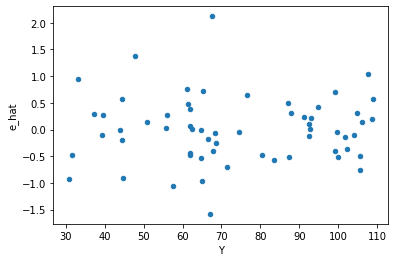

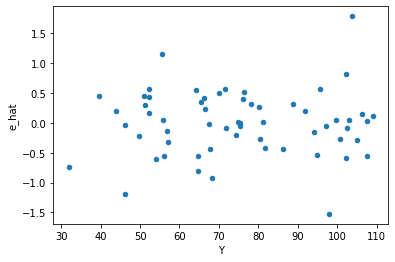

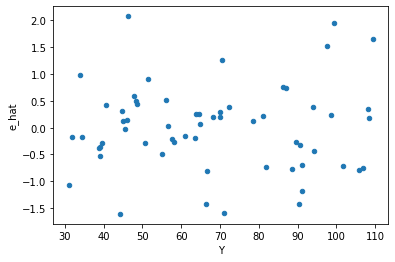

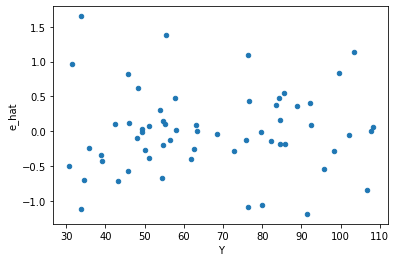

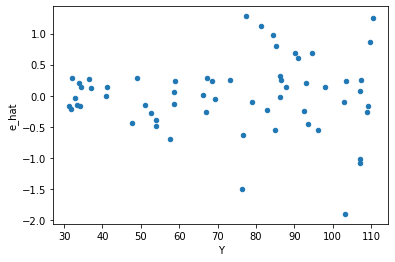

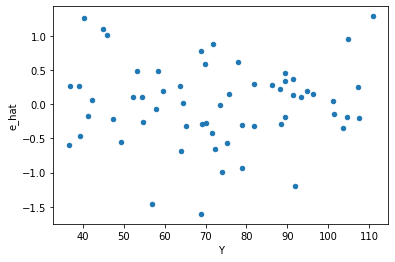

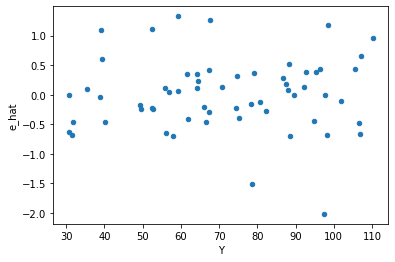

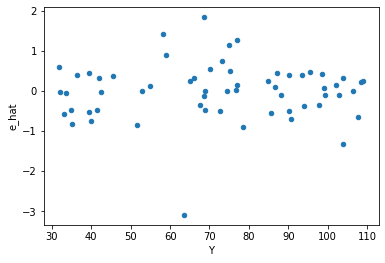

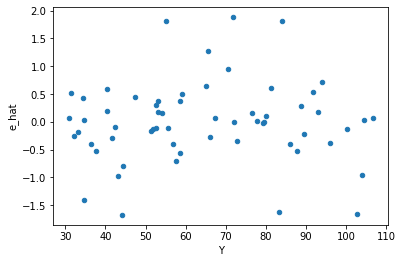

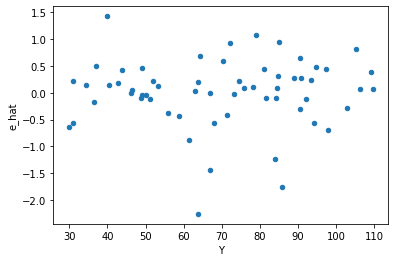

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,35.0,23.0,8.876081312976462,8.306998771920819,0.2536023232278989,0.3611738596487313,1.4241740968759327,0.3768202267133556,0.8115898866433222,0.1884101133566778,Reject001=1 : Homoscedasticity
2.0,37.0,21.0,19.54889228133355,17.283336231236202,0.5283484400360419,0.8230160110112477,1.557714471448245,0.28252333307491195,0.858738333462544,0.14126166653745598,Reject001=1 : Homoscedasticity
3.0,33.0,25.0,11.134302715865562,9.3545145408713,0.33740311260198674,0.374180581634852,1.10900157010777,0.7983425952134029,0.6008287023932986,0.39917129760670145,Reject001=1 : Homoscedasticity
6.0,30.0,28.0,9.284115169309256,12.363026164529792,0.30947050564364187,0.44153664873320686,1.426748722999924,0.34747091990655354,0.8262645400467232,0.17373545995327677,Reject001=1 : Homoscedasticity
11.0,27.0,31.0,8.911049131884122,21.15101223878497,0.33003885673644895,0.6822907173801602,2.06730420813753,0.0526416045900977,0.9736791977049511,0.02632080229504885,Reject001=1 : Homoscedasticity
18.0,29.0,29.0,8.934512217339044,11.243205483035398,0.308086628184105,0.3876967407943241,1.2584017134383583,0.5399482691044422,0.7300258654477789,0.2699741345522211,Reject001=1 : Homoscedasticity
20.0,31.0,27.0,9.951398389525416,11.247293318292376,0.3210128512750134,0.41656641919601395,1.2976627494552837,0.49505945020616227,0.7524702748969189,0.24752972510308113,Reject001=1 : Homoscedasticity
21.0,30.0,28.0,12.175386622852985,12.393002129769249,0.4058462207617662,0.44260721892033034,1.0905786386024845,0.8205138579428453,0.5897430710285774,0.41025692897142263,Reject001=1 : Homoscedasticity
22.0,29.0,29.0,3.7961460973120524,14.419299714195189,0.13090158956248457,0.497217231523972,3.7984048412691758,0.0005746938795987422,0.9997126530602006,0.0002873469397993711,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,34.0,24.0,17.66859079587558,4.849472801142712,0.5196644351728112,0.20206136671427966,0.3888304702766226,0.0114872800428671,Reject001=1 : Homoscedasticity
1.0,35.0,23.0,8.876081312976462,8.306998771920819,0.2536023232278989,0.3611738596487313,1.4241740968759327,0.3768202267133556,Reject001=1 : Homoscedasticity
2.0,37.0,21.0,19.54889228133355,17.283336231236202,0.5283484400360419,0.8230160110112477,1.557714471448245,0.28252333307491195,Reject001=1 : Homoscedasticity
3.0,33.0,25.0,11.134302715865562,9.3545145408713,0.33740311260198674,0.374180581634852,1.10900157010777,0.7983425952134029,Reject001=1 : Homoscedasticity
4.0,32.0,26.0,17.457834451141526,1.8025398843444695,0.5455573265981727,0.06932845709017191,0.1270782257154717,1.4964435625172637e-07,Reject001=0 : Heteroscedasticity
5.0,31.0,27.0,12.589458050575345,7.002299443286765,0.40611155001855953,0.25934442382543577,0.6386039102152686,0.22855174519903793,Reject001=1 : Homoscedasticity
6.0,30.0,28.0,9.284115169309256,12.363026164529792,0.30947050564364187,0.44153664873320686,1.426748722999924,0.34747091990655354,Reject001=1 : Homoscedasticity
7.0,40.0,18.0,23.14470188478314,5.920393495383608,0.5786175471195785,0.32891074974353374,0.5684424044533172,0.1367790815713728,Reject001=1 : Homoscedasticity
8.0,24.0,34.0,13.013243507339544,14.400291262978257,0.542218479472481,0.4235379783228899,0.7811205157281725,0.5336982138696825,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      936
Reject001=0 : Heteroscedasticity     64
Name: Result_test, dtype: int64